# Workshop 10: SVMs and Hyperparameter Tuning

In this lab, you'll be working with Support Vector Machines.

## 0) Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
random_state = 42

In [2]:
from sklearn.model_selection import train_test_split

## 1) Loading the Data

First, load the data `svm_data_2020.csv`.

In [3]:
df = pd.read_csv('./data/svm_data_2020.csv')

In [4]:
df["Class"].value_counts()

0    83
1    73
Name: Class, dtype: int64

## 2) Splitting the Data (Group)

Now, split the data into a training and test set. 75% of the data should be in the training set, and 25% should be in the testing set.

Report the number of positive and negative samples in both training and testing data.

In [5]:
y = df["Class"]
X = df.drop("Class", axis=1)

In [6]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25,random_state=random_state)

In [7]:
# Report positive and negative samples
len(X_train)

117

In [8]:
y_train.value_counts()

0    65
1    52
Name: Class, dtype: int64

In [9]:
y_test.value_counts()

1    21
0    18
Name: Class, dtype: int64

## 3) Training the Model

Now, you will use sklearns [support vector classifier](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) to fit a model to this data.

In [10]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

### 3.1 Fitting the Model and Getting the Support Vectors (Group)

Fit the SVC to your split data (using the default hyperparams), and report back the number of support vectors. Use `clf.support_vectors_`, which returns a list of the actual support vectors.

In [11]:
# Create model and get the number of support vectors
clf = SVC(C=100)
clf.fit(X_train, y_train)
print(len(clf.support_vectors_))
print(len(clf.support_vectors_[0]))
print(clf.support_vectors_)
clf.n_support_

64
60
[[0.053 0.088 0.2   ... 0.015 0.013 0.006]
 [0.027 0.016 0.034 ... 0.009 0.01  0.009]
 [0.016 0.024 0.015 ... 0.005 0.002 0.002]
 ...
 [0.052 0.055 0.084 ... 0.005 0.005 0.005]
 [0.02  0.003 0.014 ... 0.002 0.006 0.004]
 [0.035 0.012 0.019 ... 0.002 0.007 0.007]]


array([32, 32], dtype=int32)

### 3.2 C hyperparameter vs Support Vector Count (Group)

*C* is the regularization hyperparameter in SVMs, and in this problem you'll be looking at how changing *C* affects the number of support vectors.

Implement the function `plot_support_vectors` below, which will plot a line chart of the number of support vectors vs. the value of *C*.

**Before implementing the function, predict the answer the following questions**
1. As C increases, how will the number of support vectors change?
2. Why?

In [12]:
"""
Input:
    params: A list of floats, representing the value of C's to try
    
Output:
    None
    Print a line chart of the number of support vectors vs. C
    
Function:
    iterate through params
        create an SVC classifier for each c
        find the length of the support vectors and append to a list
    
    create a plot with c on the X axis and length of support vectors on Y

def plot_support_vectors(params):
    list_of_C=[]
    for i in params:
        clf = SVC( C=1, gamma='auto')
        clf.fit(X_train, y_train)
        list_of_C.append(len(clf.support_vectors_))
    
    plt.plot(params, list_of_C)
    return None
"""
def plot_support_vectors(params):
    svs = []
    
    # SOLUTION
    for c in params:
        clf=SVC(C=c)
        clf.fit(X_train,y_train)
        svs.append(len(clf.support_vectors_))
    
    plt.plot(params,svs,'bo--')
    plt.xlabel('C')
    plt.ylabel('Number of Support Vectors')
    plt.title('C and Its Effect on Number of Support Vectors')
    plt.show()


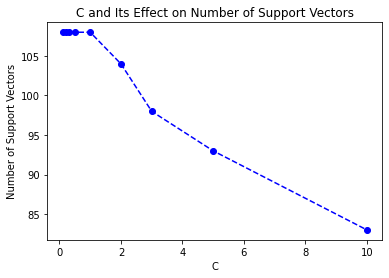

In [13]:
C = [0.1,0.2,0.3,0.5,1,2,3,5,10]
plot_support_vectors(C)

**Now that you have a plot, go back to the questions and explain more using the context of the data. If you were wrong, explain your misconception.**

## 4) Hyperparam Tuning

Compare  the  performance  of  four  different  kernel  functions:  linear (`linear`), polynomial (`poly`),  radial basis function (`rbf`), and `sigmoid`. Not only will you be changing the kernel function, you'll also be optimizing for the different hyperparams.

For each type of kernel functions, train your SVM classifiers using the training data and evaluate the resulting SVM classifer using testing data using accuracy, precision, recall and f-measure of the corresponding classification results.

### 4.1 Basic Hyperparameters (Group)

Write a function called `best_hyperparams` that when given a dictionary of params, runs a `GridSearchCV` on an SVC model using the training and test data.

Use a `cv` of 5.

This function will return the optimized classifier `clf`, and the set of best params (using `clf.best_params_`).

See the documentation for [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) for more info.

In [14]:
"""
Input:
    params_set: A dictionary of params to use for the grid search
Output:
    The classifier with the best hyperparams
    The dict of best params itself
    
Function:
    use gridsearch to find the best SVC classifier
    return the best parameters
"""


def best_hyperparams(param_set):
    # SOLUTION
    
    clf = GridSearchCV(SVC(), param_set, cv=5)
    clf.fit(X_train,y_train)
    return clf.best_params_, clf
    # END SOLUTION

In [15]:
# Here are the value ranges for each of the params.
# We will tell you which of these to tune for which kernel.

# C is the regularization paramater we've discussed before
C = [0.1,0.2,0.3,0.5,1,2,3,5,10]

# degree is the degree of the polynomial used for the polynomial kernel
degree = [1,2,3,4,5]

# coef is the independent term in the kernel function, and is ony used by poly and sigmoid
coef0 = [0.0001,0.001,0.002,0.01,0.02,0.1,0.2,0.3,1,2,5,10]

# gamma is the kernel coefficent used for rbf, poly, and sigmoid
gamma = [0.0001,0.001,0.002,0.01,0.02,0.1,0.2,0.3,1,2,3]

In [16]:
from sklearn.metrics import classification_report

### Linear Kernel (Follow)
For the **linear** kernel, tune `C`.

In [17]:
params = [{
    "kernel":["linear"],
    "C":C
}]

params, model = best_hyperparams(params)
print(params)
predictions = model.predict(X_test)
print(classification_report(predictions,y_test))

{'C': 3, 'kernel': 'linear'}
              precision    recall  f1-score   support

           0       0.89      0.80      0.84        20
           1       0.81      0.89      0.85        19

    accuracy                           0.85        39
   macro avg       0.85      0.85      0.85        39
weighted avg       0.85      0.85      0.85        39



### Poly Kernel (Group)
For the **polynomial** kernel, tune `C`, `degree` and `coef0`.

In [18]:
params = [{
    "kernel":["poly"],
    "C":C,
    "degree":degree,
    "coef0":coef0
}]

params, model = best_hyperparams(params)
print(params)
predictions = model.predict(X_test)
print(classification_report(y_test, predictions))

{'C': 5, 'coef0': 2, 'degree': 2, 'kernel': 'poly'}
              precision    recall  f1-score   support

           0       0.84      0.89      0.86        18
           1       0.90      0.86      0.88        21

    accuracy                           0.87        39
   macro avg       0.87      0.87      0.87        39
weighted avg       0.87      0.87      0.87        39



### RBF Kernel (Group)
For the **rbf** kernel, tune `C` and `gamma`.

In [19]:
params = [{
    "kernel":["rbf"],
    "C":C,
    "gamma":gamma
}]

params, model = best_hyperparams(params)
print(params)
predictions = model.predict(X_test)
print(classification_report(y_test, predictions))

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
              precision    recall  f1-score   support

           0       0.70      0.78      0.74        18
           1       0.79      0.71      0.75        21

    accuracy                           0.74        39
   macro avg       0.74      0.75      0.74        39
weighted avg       0.75      0.74      0.74        39



### Sigmoid Kernel (Group)

For the **sigmoid** kernel, tune `C`, `coef0`, and `gamma`.

In [20]:
params = [{
    "kernel":["sigmoid"],
    "C":C,
    "coef0":coef0,
    "gamma":gamma
}]

params, model = best_hyperparams(params)
print(params)
predictions = model.predict(X_test)
print(classification_report(y_test, predictions))

{'C': 10, 'coef0': 0.02, 'gamma': 0.01, 'kernel': 'sigmoid'}
              precision    recall  f1-score   support

           0       0.58      0.78      0.67        18
           1       0.73      0.52      0.61        21

    accuracy                           0.64        39
   macro avg       0.66      0.65      0.64        39
weighted avg       0.66      0.64      0.64        39



### Results

Consider the following visualizaion of how SVM predicts with different kernels on different datasets:

![Different Kernels](https://i.imgur.com/HKTLn35.png)

Given your results, answer the following questions:

1. Which kernel performed best?
2. What criteria are you using to define the best model?
3. Based on the best-performing model(s), what properties do you think the data have (e.g. is is close to linearly separable)?

**Answer here**
1. RBF SVM, its accuracy shows the best results for classifying the data.
2. 
3. 